In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import glob, operator, time, shutil, scipy, sys
from matplotlib import pyplot as plt
import matplotlib.cm as cm
pd.set_option('display.max_columns', 100)
plt.style.use('classic')

In [3]:
def new_fig(figsize=(8, 8)):
    plt.close()
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)    
    ax.yaxis.grid(linestyle='--')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_markersize(8)
    return ax

In [4]:
df = pd.read_csv('/lus/theta-fs0/projects/AMASE/rsonntag/data/composed/mira_top_10.csv', low_memory=False)

In [5]:
# df.dropna(inplace=True)
# for cols in df.columns:
#     print(cols)

In [6]:
# df.sample(frac=1);

In [7]:
df.zero_execName.unique()

array(['mcfm_omp', 'Pmfix152.O3.GNU.mira', 'converge', 'Pelegant',
       'aims.151107.scalapack.mpi.x', 'cesm.exe', 'hops', 'flash4',
       'xmfdn-menj_BGQ-lan', 'pencil', 'bigdft'], dtype=object)

In [8]:
df.USED_CORE_HOURS.sum()

20460762148.501698

In [9]:
df['Wall_Time'] = df.WALLTIME_SECONDS / 3600
df['Run_Time'] = df.RUNTIME_SECONDS / 3600

In [10]:
# %matplotlib inline
# # plt.scatter(result.name, result.t_std / result.t_mean)
# for i in range(9):
# #     print(df[df.zero_execName == df.zero_execName.unique()[i]].zero_elapsedTime.describe())
#     fig = plt.figure()
#     plt.hist(df[df.zero_execName == df.zero_execName.unique()[i]].zero_elapsedTime, bins=20);
#     plt.title(df.zero_execName.unique()[i])
# # plt.hist(df[df.zero_execName == 'pibis'][df.zero_elapsedTime >= 1000].zero_elapsedTime, bins=20);

In [11]:
df[df.zero_execName == 'miniFE.V1R2M4-xl.x'].USED_CORE_HOURS.sum()

0.0

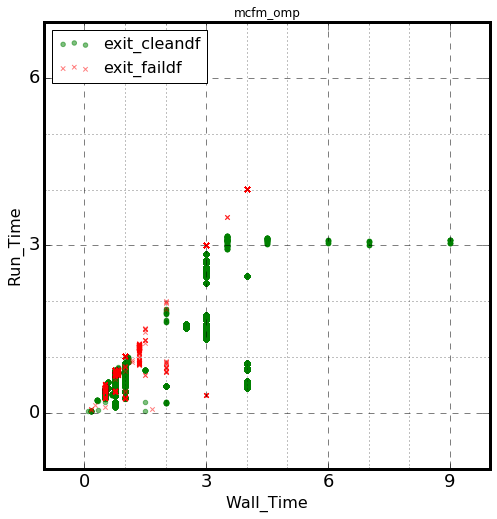

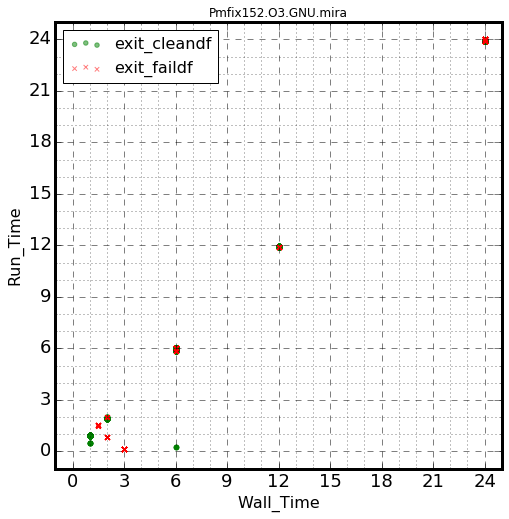

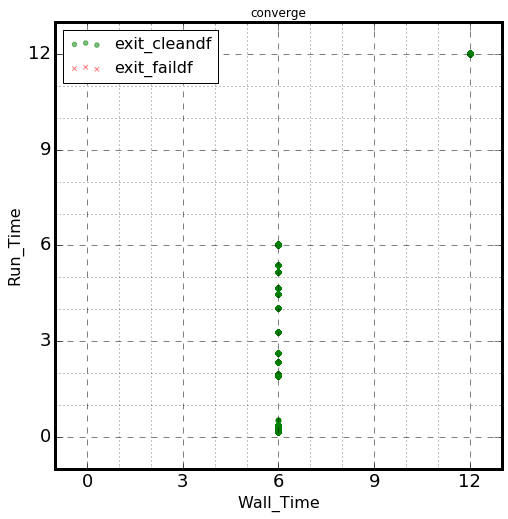

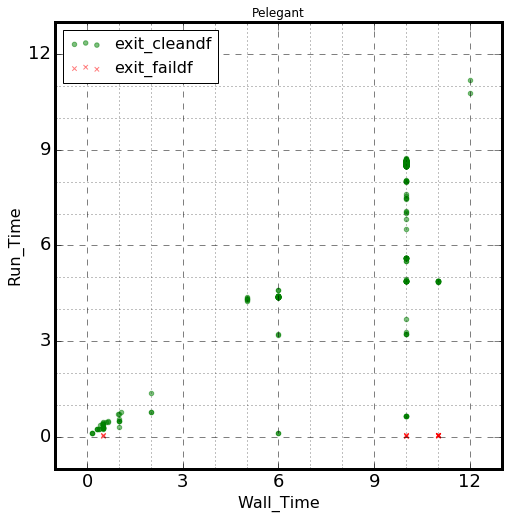

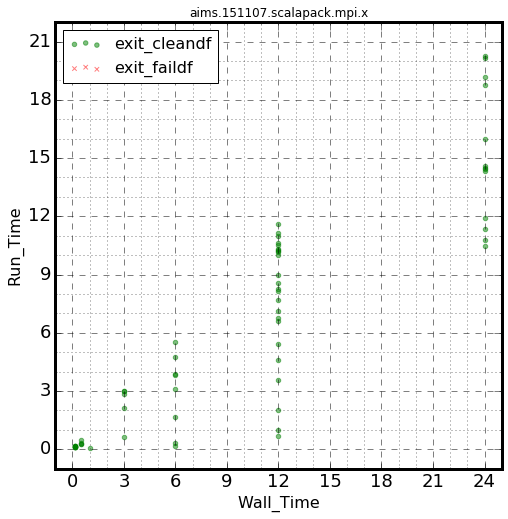

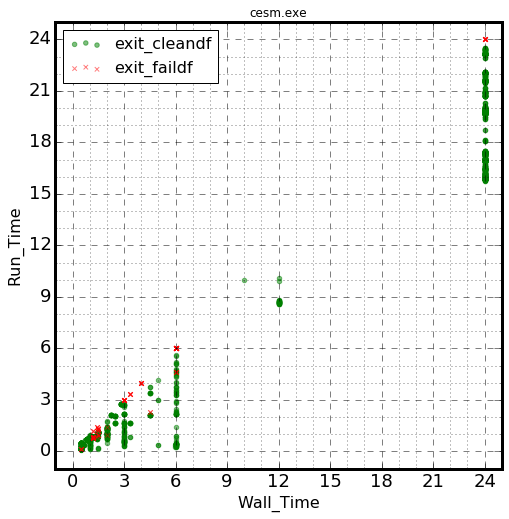

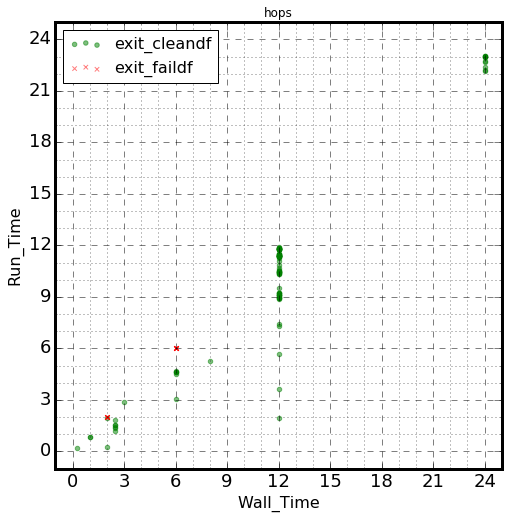

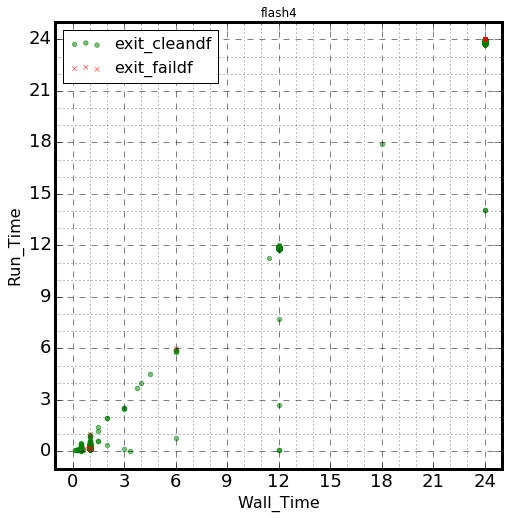

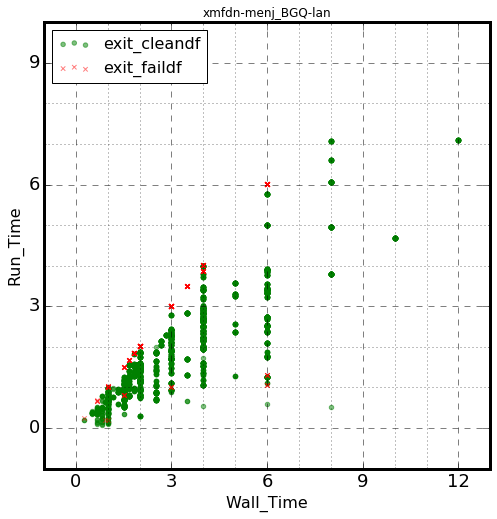

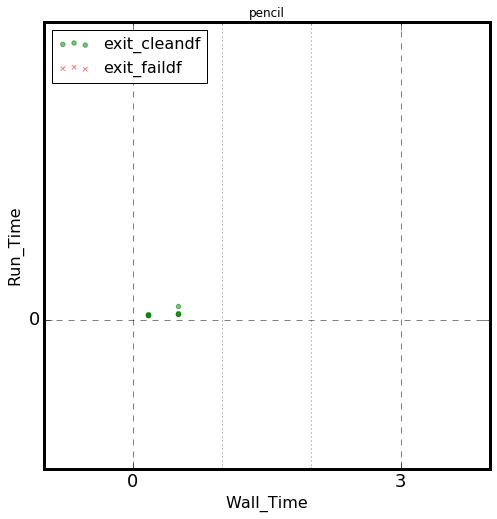

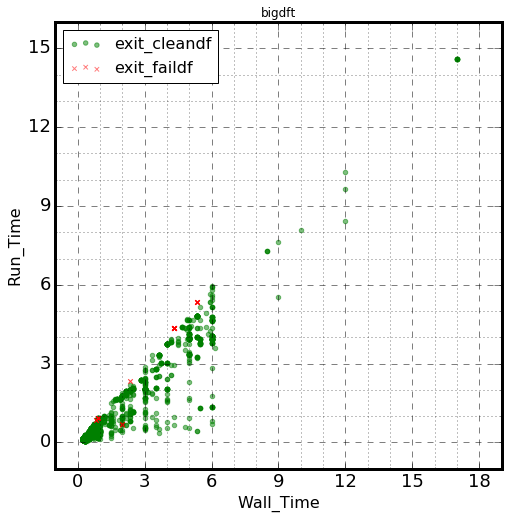

In [12]:
# --
# Scatter Implementation
# --

%matplotlib inline

for i in range(len(df.zero_execName.unique())):
    plotdf = df[df.zero_execName == df.zero_execName.unique()[i]]
    exit_cleandf = plotdf[plotdf['EXIT_STATUS'] == 0].append(plotdf[plotdf['EXIT_STATUS'] > 255])
    exit_faildf = pd.concat([plotdf, exit_cleandf, exit_cleandf]).drop_duplicates(keep=False)
    ax = new_fig()
    
    # Renee's major grid
    ax.xaxis.grid(linestyle='--')
    # Renee's minor grid
    from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
    plt.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator(3))
    ax.yaxis.set_minor_locator(AutoMinorLocator(3))
    ax.set_autoscale_on(False)
    plt.grid(b=True, which='minor', linestyle=':')
    # end Renee's minor grid
    
    l1 = plt.scatter(exit_cleandf['Wall_Time'], 
                exit_cleandf['Run_Time'], 
                color = 'green',
                marker = 'o',
                alpha = 0.5
               )
    l2 = plt.scatter(exit_faildf['Wall_Time'], 
                exit_faildf['Run_Time'],
                color = 'red',
                marker = 'x',
                alpha = 0.5
               )
    # Renee's New New X Axis
    
    partAxis = [0]
    maxAxis = 0
    failMaxAxis = 0
    
    if len(exit_cleandf['Wall_Time']) > 0:
        maxAxis = max(exit_cleandf['Wall_Time'])
    if len(exit_faildf['Wall_Time']) > 0:
        failMaxAxis = max(exit_faildf['Wall_Time'])
    
    if maxAxis < failMaxAxis:
        maxAxis = failMaxAxis
    
    for j in range(1,9): # 0 to 24
        if maxAxis > (j-1)*3:
            partAxis.append(j*3)
    
    plt.xticks(partAxis)
    #plt.xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
    leftLim, rightLim = plt.xlim()
    leftLim -= 1
    rightLim += 1
    plt.xlim(leftLim, rightLim)
    # end Renee's New New X Axis
    #print("Max X: ", maxAxis)
    
    # Renee's New New Y Axis
    
    newYAxis = [0]
    maxAxis = 0
    failMaxAxis = 0
    
    if len(exit_cleandf['Run_Time']) > 0:
        maxAxis = max(exit_cleandf['Run_Time'])
    if len(exit_faildf['Run_Time']) > 0:
        failMaxAxis = max(exit_faildf['Run_Time'])
    
    if maxAxis < failMaxAxis:
        maxAxis = failMaxAxis
    
    for j in range(1,9): # 0 to 24
        if maxAxis > ((j-1)*3 + 1):
            newYAxis.append(j*3)
    
    plt.yticks(newYAxis)
    #plt.xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
    leftLim, rightLim = plt.ylim()
    leftLim -= 1
    rightLim += 1
    plt.ylim(leftLim, rightLim)
    # end Renee's New New Y Axis
    #print("Max Y: ", maxAxis)
    
    # Renee's Axis Labels
    ax.set_xlabel("Wall_Time")
    ax.set_ylabel("Run_Time")
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    ax.legend((l1, l2), ('exit_cleandf', 'exit_faildf'), loc="upper left", prop={'size': 16})
    # End Renee's Axis Labels
    plt.title(df.zero_execName.unique()[i]) # TEMPORARY
    
    plt.show()
    #if maxAxis > 15: break
# for i in range(len(df.zero_execName.unique())):
#     plotdf = df[df.zero_execName == df.zero_execName.unique()[i]]
#     exit_cleandf = plotdf[plotdf['EXIT_STATUS'] == 0].append(plotdf[plotdf['EXIT_STATUS'] > 255])
#     exit_faildf = pd.concat([plotdf, exit_cleandf, exit_cleandf]).drop_duplicates(keep=False)
#     ax = exit_cleandf.plot(x='Wall_Time', y='Run_Time', kind='scatter', title=df.zero_execName.unique()[i],
#                xticks=range(25),
#                yticks=range(25),
#                figsize=(15,15),
#                alpha=.5,
#                color='Green',
#                grid=True)
#     exit_faildf.plot(x='Wall_Time', y='Run_Time', kind='scatter', title=df.zero_execName.unique()[i],
#                alpha=.1,
#                ax = ax,
#                color='Green',
#                     grid=True)
#     plt.scatter(plotdf.WALLTIME_SECONDS, plotdf.RUNTIME_SECONDS);
#     plt.title(df.zero_execName.unique()[i])
# plt.savefig('figure/charles_exe.png')

In [13]:
# # --
# # Hexbin Adaptation
# # --

# %matplotlib inline

# import math

# for i in range(len(df.zero_execName.unique())):
#     plotdf = df[df.zero_execName == df.zero_execName.unique()[i]]
#     exit_cleandf = plotdf[plotdf['EXIT_STATUS'] == 0].append(plotdf[plotdf['EXIT_STATUS'] > 255])
#     exit_faildf = pd.concat([plotdf, exit_cleandf, exit_cleandf]).drop_duplicates(keep=False)
#     ax = new_fig()
    
#     # Renee's major grid
#     ax.xaxis.grid(linestyle='--')
#     # Renee's minor grid
#     from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
#                                AutoMinorLocator)
#     plt.minorticks_on()
#     ax.xaxis.set_minor_locator(AutoMinorLocator(3))
#     ax.yaxis.set_minor_locator(AutoMinorLocator(3))
#     ax.set_autoscale_on(False)
#     plt.grid(b=True, which='minor', linestyle=':')
#     # end Renee's minor grid
    
# #     l2 = plt.hexbin(exit_faildf['Wall_Time'], 
# #                 exit_faildf['Run_Time'],
# #                 cmap='inferno',
# #                     gridsize=10
# #                )
#     # Renee's New New X Axis
    
#     partAxis = [0]
#     maxAxis = 0
#     failMaxAxis = 0
    
#     if len(exit_cleandf['Wall_Time']) > 0:
#         maxAxis = max(exit_cleandf['Wall_Time'])
# #    if len(exit_faildf['Wall_Time']) > 0:
# #        failMaxAxis = max(exit_faildf['Wall_Time'])
    
#     if maxAxis < failMaxAxis:
#         maxAxis = failMaxAxis
    
#     for j in range(1,9): # 0 to 24
#         if maxAxis > (j-1)*3:
#             partAxis.append(j*3)
    
#     plt.xticks(partAxis)
#     #plt.xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
#     leftLim, rightLim = plt.xlim()
#     leftLim -= 1
#     rightLim += 1
#     plt.xlim(leftLim, rightLim)
#     # end Renee's New New X Axis
#     #print("Max X: ", maxAxis)
    
#     # Renee's New New Y Axis
#     max_xAxis = maxAxis
#     newYAxis = [0]
#     maxAxis = 0
#     failMaxAxis = 0
    
#     if len(exit_cleandf['Run_Time']) > 0:
#         maxAxis = max(exit_cleandf['Run_Time'])
# #    if len(exit_faildf['Run_Time']) > 0:
# #        failMaxAxis = max(exit_faildf['Run_Time'])
    
#     if maxAxis < failMaxAxis:
#         maxAxis = failMaxAxis
    
#     for j in range(1,9): # 0 to 24
#         if maxAxis > ((j-1)*3 + 1):
#             newYAxis.append(j*3)
    
#     plt.yticks(newYAxis)
#     #plt.xticks([0, 3, 6, 9, 12, 15, 18, 21, 24])
#     leftLim, rightLim = plt.ylim()
#     leftLim -= 1
#     rightLim += 1
#     plt.ylim(leftLim, rightLim)
#     # end Renee's New New Y Axis
#     #print("Max Y: ", maxAxis)
    
#     # Renee's Axis Labels
#     ax.set_xlabel("Wall_Time")
#     ax.set_ylabel("Run_Time")
#     ax.xaxis.label.set_fontsize(16)
#     ax.yaxis.label.set_fontsize(16)
#     #ax.legend((l1, l2), ('exit_cleandf', 'exit_faildf'), loc="upper left", prop={'size': 16})
#     # End Renee's Axis Labels
#     plt.title(df.zero_execName.unique()[i]) # TEMPORARY
    
#     l1 = plt.hexbin(exit_cleandf['Wall_Time'], 
#                 exit_cleandf['Run_Time'], 
#                 cmap='YlOrRd',
#                 gridsize=(math.ceil(max_xAxis),math.ceil(maxAxis))
#                )
    
#     plt.show()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: Ran

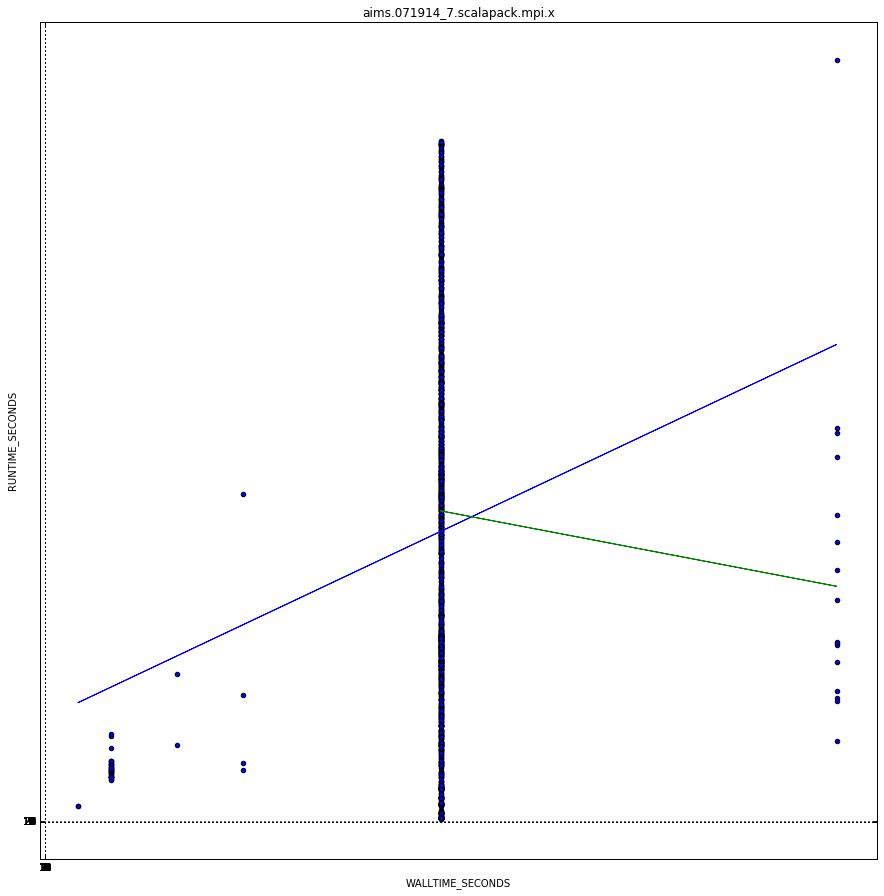

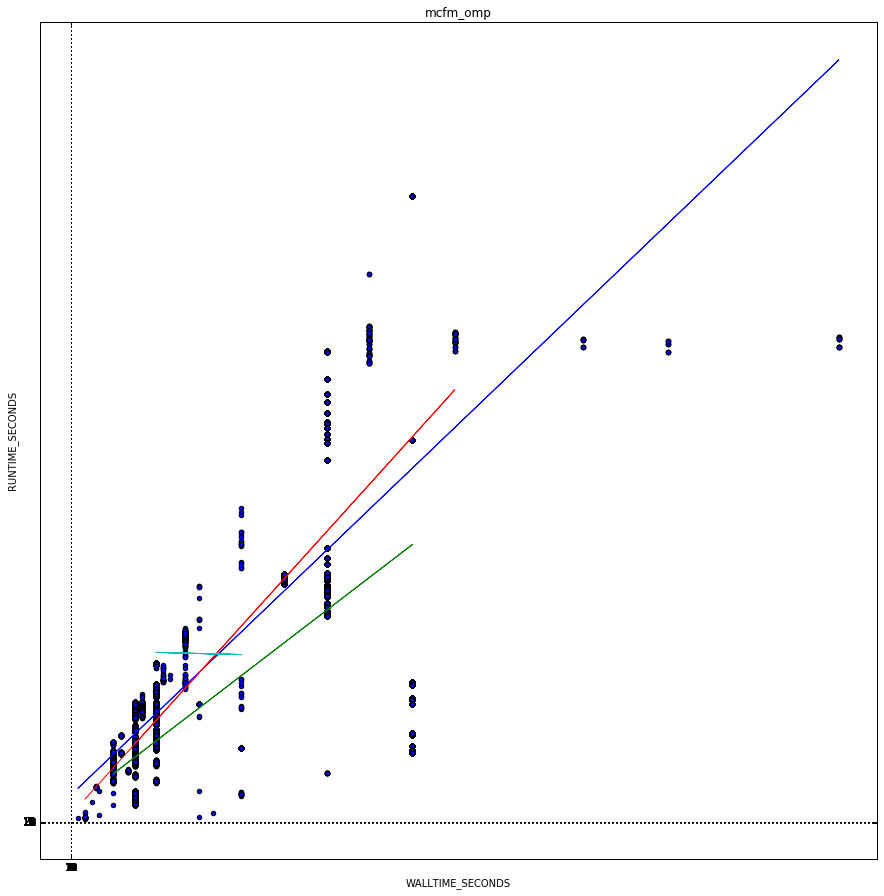

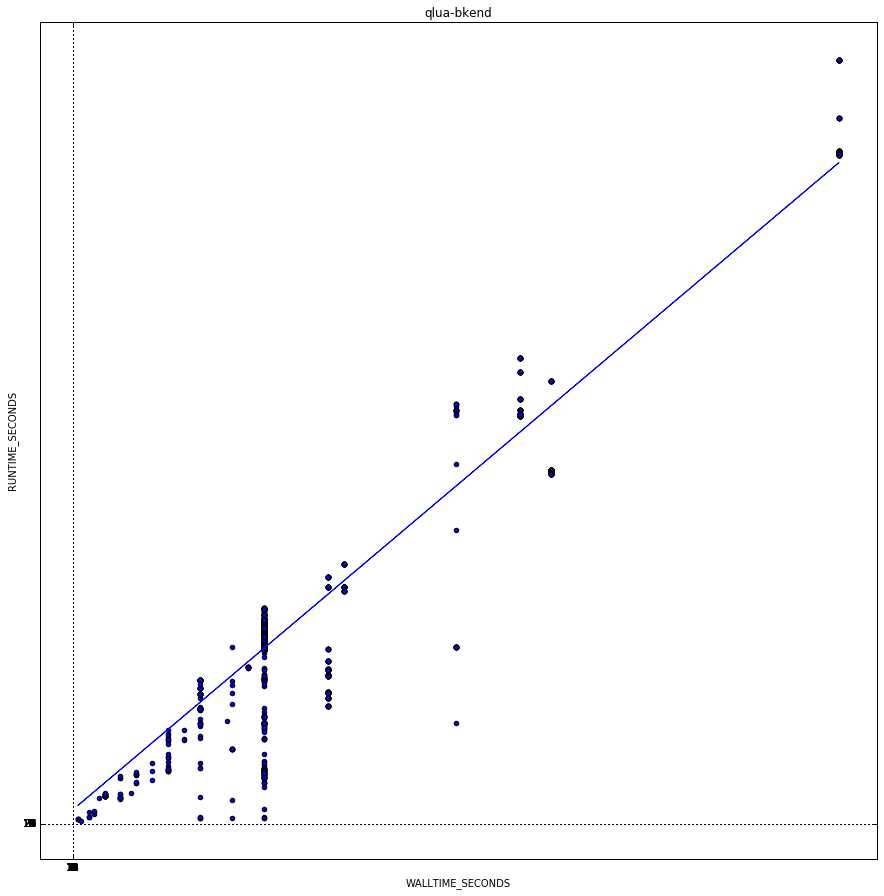

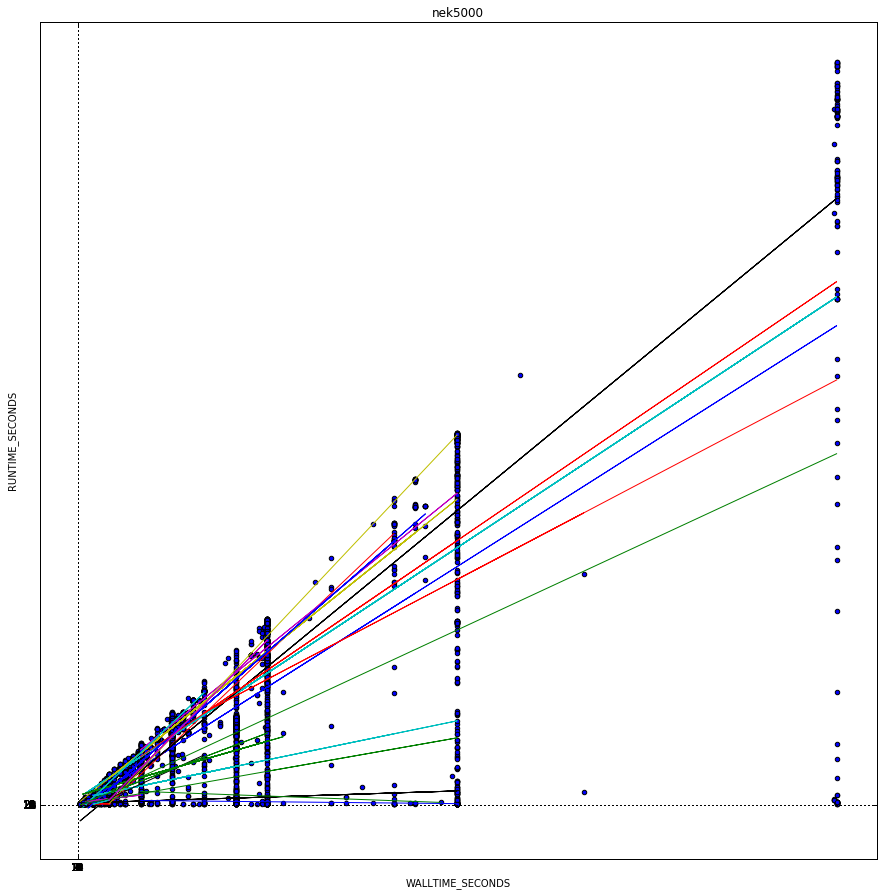

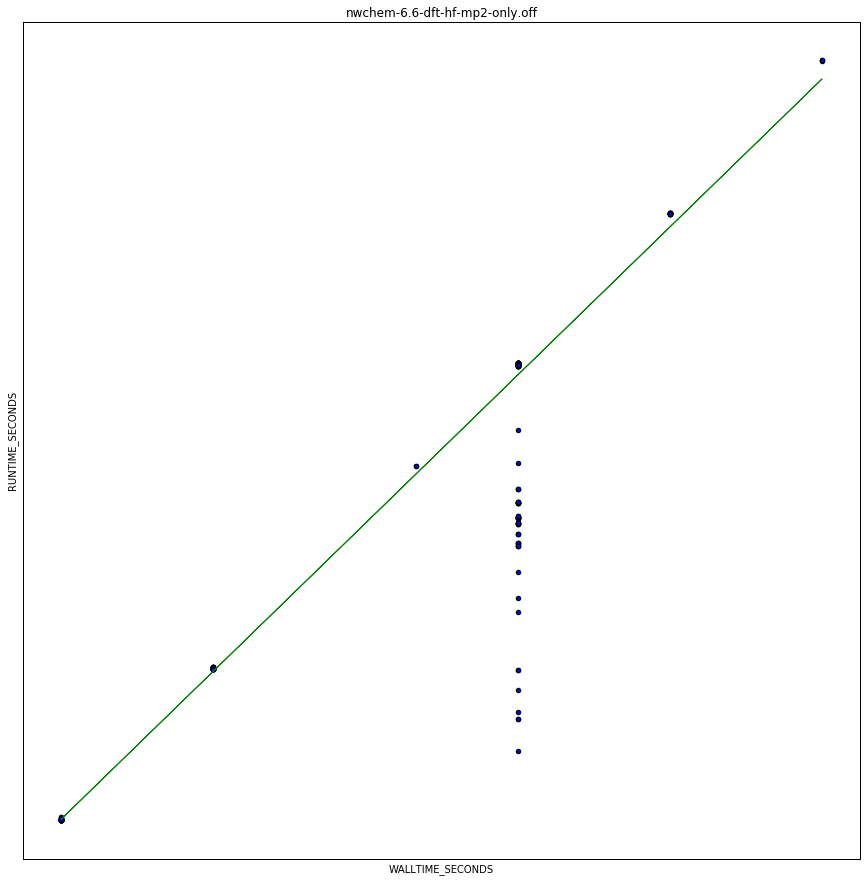

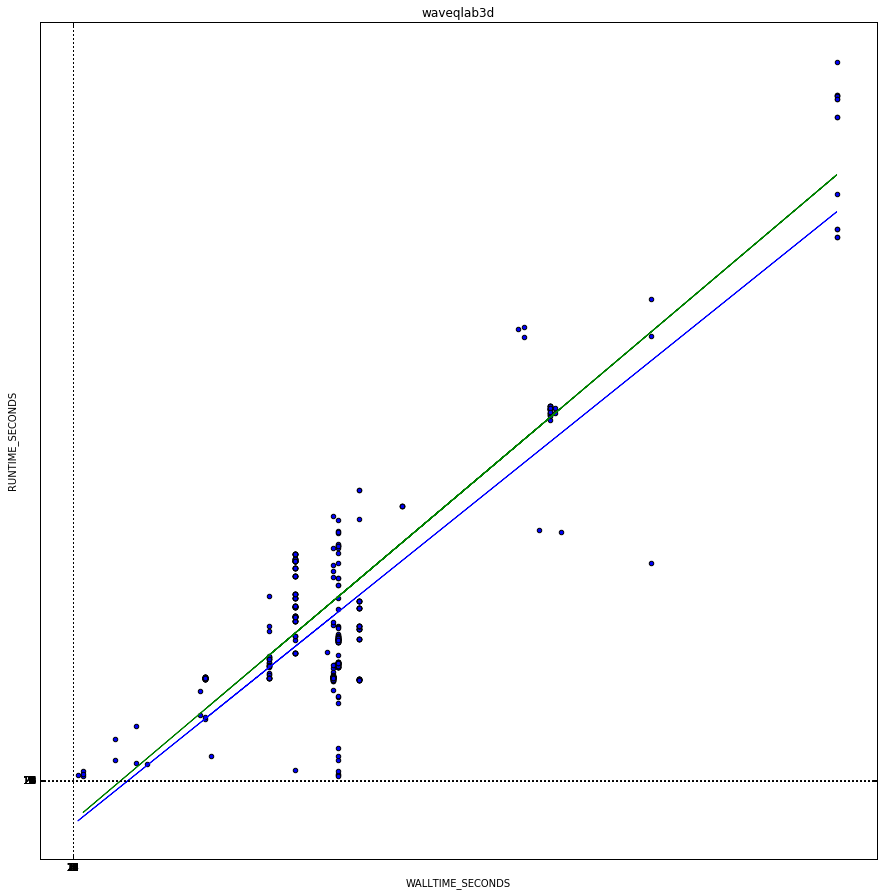

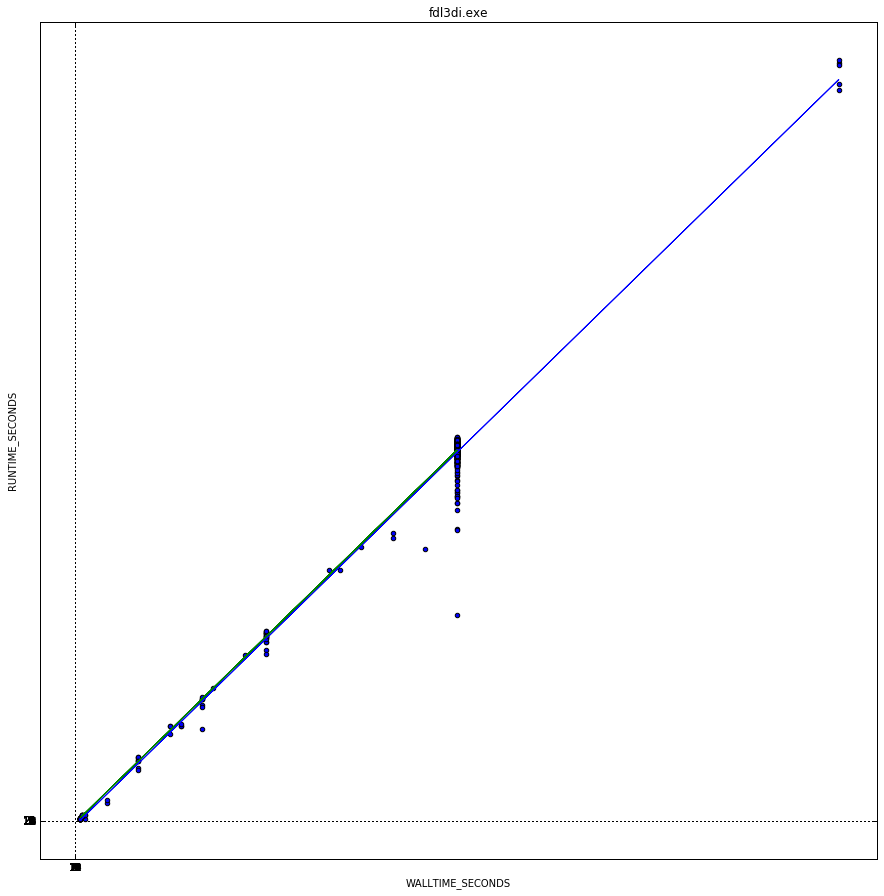

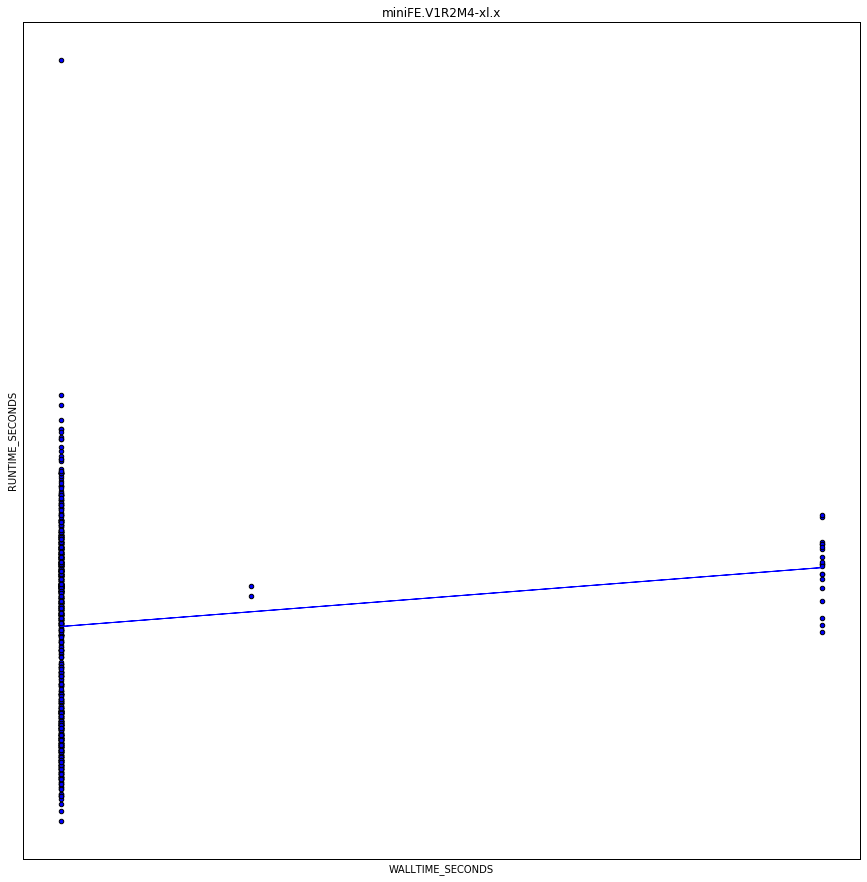

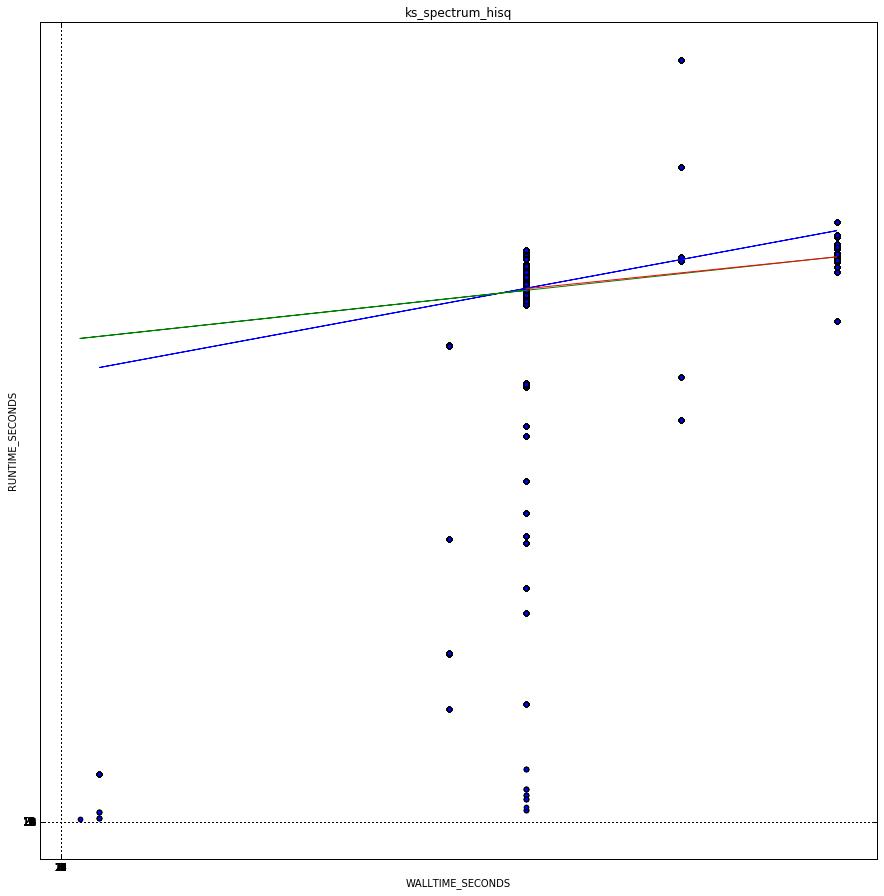

In [85]:
%matplotlib inline
colors = cm.rainbow(np.linspace(0, 1, len(df.zero_userName.unique())))
for i in range(9):
    plotdf = df[df.zero_execName == df.zero_execName.unique()[i]]
    userids = plotdf.zero_userName.unique()
    j = -1
    for uname in userids:
        j += 1
        if j == 0:
            userdf = plotdf[plotdf.zero_userName == userids[j]].copy()
            ax = userdf.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='scatter', title=df.zero_execName.unique()[i],
                       xticks=range(25),
                       yticks=range(25),
                       figsize=(15,15),
#                        alpha=.5,
#                        color=colors[j],
                       grid=True,
                       legend=False)
            lm_original = np.polyfit(userdf.WALLTIME_SECONDS, userdf.RUNTIME_SECONDS, 1)
            r_x, r_y = zip(*((k, k*lm_original[0] + lm_original[1]) for k in userdf.WALLTIME_SECONDS))
            lm_original_plot = pd.DataFrame({'WALLTIME_SECONDS': r_x, 'RUNTIME_SECONDS': r_y})
            lm_original_plot.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='line', title=df.zero_execName.unique()[i],
                       ax=ax,
#                        color=colors[j],
                       grid=True,
                       legend=False)
        else:
            userdf = plotdf[plotdf.zero_userName == uname].copy()
            lm_original = np.polyfit(userdf.WALLTIME_SECONDS, userdf.RUNTIME_SECONDS, 1)
            r_x, r_y = zip(*((k, k*lm_original[0] + lm_original[1]) for k in userdf.WALLTIME_SECONDS))
            lm_original_plot = pd.DataFrame({'WALLTIME_SECONDS': r_x, 'RUNTIME_SECONDS': r_y})
            userdf.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='scatter', title=df.zero_execName.unique()[i],
#                        alpha=.5,
                       ax = ax,
#                        color=colors[j],
                       grid=True,
                       legend=False)
            lm_original_plot.plot(x='WALLTIME_SECONDS', y='RUNTIME_SECONDS', kind='line', title=df.zero_execName.unique()[i],
                       ax=ax,
#                        color=colors[j],
                       grid=True,
                       legend=False)

Runtime Accuracy Prediction, by Process, by User:

 aims.071914_7.scalapack.mpi.x :
= : 0.43351144015916787
jili : 0.452590227996814

 mcfm_omp :
= : 0.6934806070722639
rboughez : 0.4755397835652608
frankjp : 0.6643918546328252
xiliu : 0.8050189226925336

 qlua-bkend :
syritsyn : 0.8149056770893085
engel : 0.8120796059096609
pochinsk : 0.9014206570587321

 nek5000 :
= : 0.6177089709559888
obabko : 0.37083473153811164
maijiaqi : 0.594037037037037
mayildiz : 0.6625362654320988
crusher : 0.3272868217054264
gbot : 0.8058912948933783
jklai : 0.7043661199147982
nicolaso : 0.35777777777777775
javier : 0.5346312915479582
mmin : 0.09412037037037037
antonio : 0.46703703703703703
bissett : 0.8526157407407409
maxhutch : 0.6726388888888889
svegendl : 0.28494107224508464
vidal : 0.7140326227890439
sspatel : 0.11658212560386473
lfick : 0.685162037037037
kmittal : 0.7326199494949496
mschanen : 0.2958055555555556
tasneem : 0.05138888888888889
merzari : 0.019305555555555555
omarin : 0.24569444444444444


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96fcdac3c8>]],
      dtype=object)

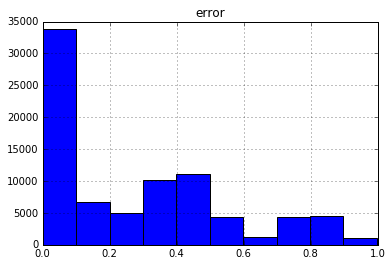

In [86]:
print("Runtime Accuracy Prediction, by Process, by User:")
for i in range(9):
    execdf = df[df.zero_execName == df.zero_execName.unique()[i]]
    print("\n", df.zero_execName.unique()[i], ":")
    userids = execdf.zero_userName.unique()
    for uid in userids:
        userdf = execdf[execdf.zero_userName == uid].copy()
        userdf['error'] = userdf["RUNTIME_SECONDS"] / userdf["WALLTIME_SECONDS"]
        print(uid, ":", userdf.error.mean())

%matplotlib inline
errdf = df.copy()
errdf['error'] = abs(1 - errdf["RUNTIME_SECONDS"] / errdf["WALLTIME_SECONDS"])
errdf.hist(column='error')

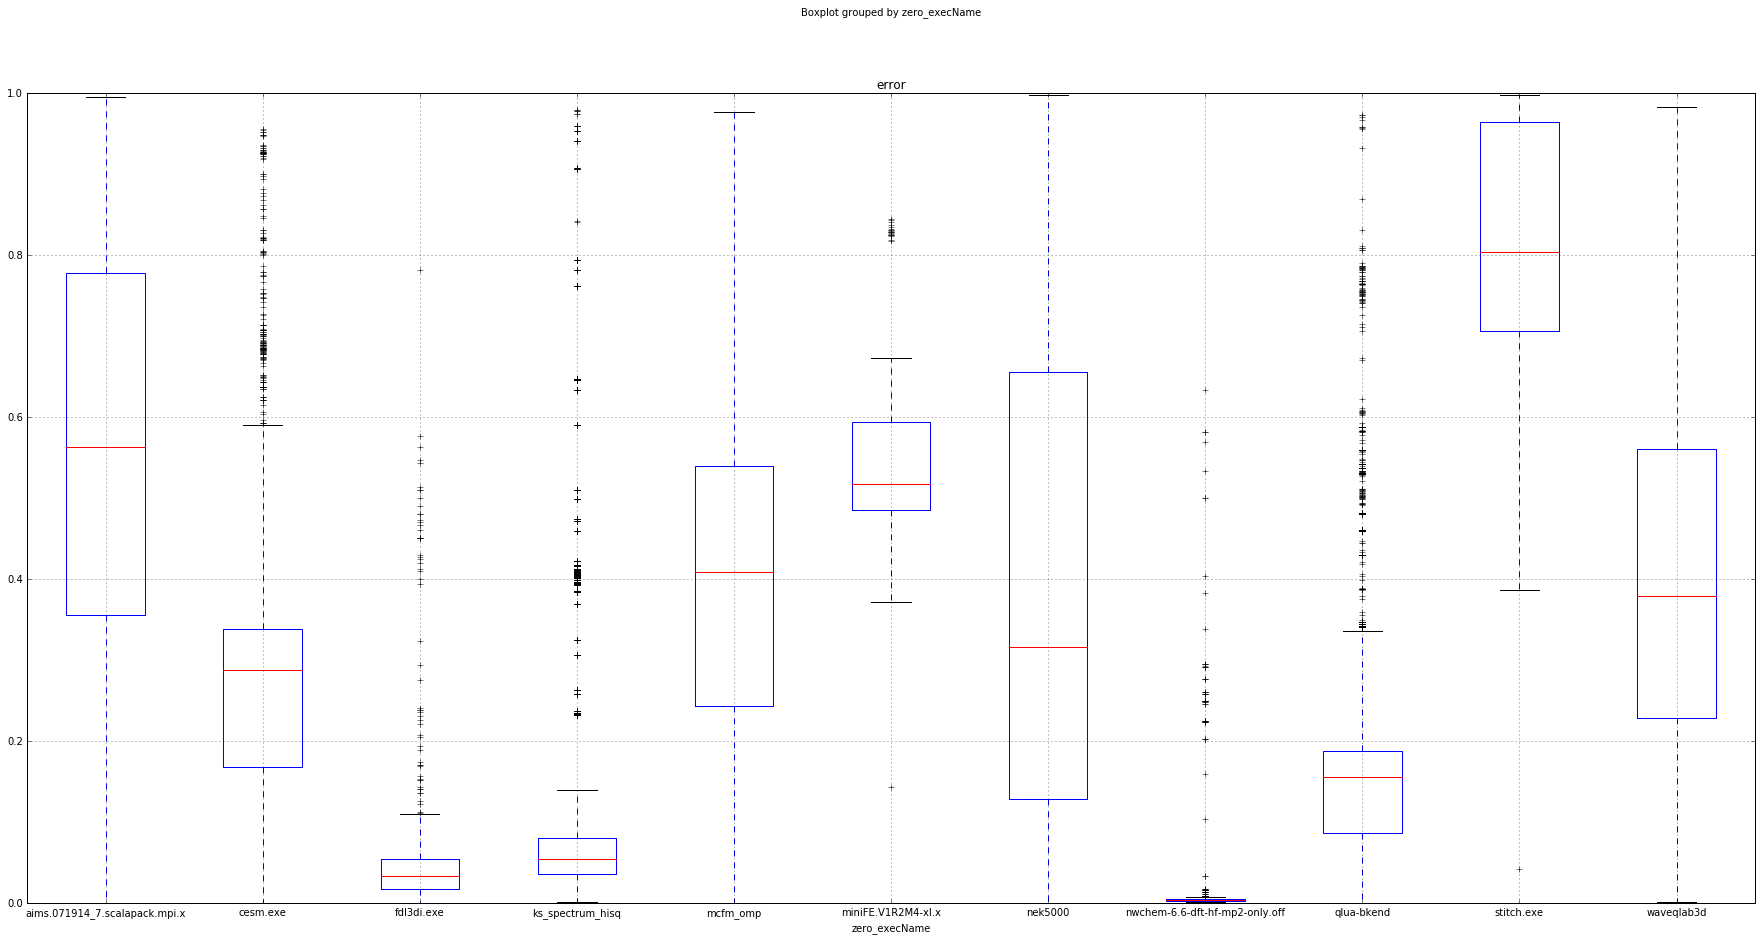

In [87]:
errdf.boxplot(column='error', by='zero_execName', figsize=(30, 15))

In [88]:
#  rows = []
#  # result = pd.DataFrame(columns=['name', 'ranks', 'procs', 't_mean', 't_std'])
#  for name in df.zero_execName.unique():
#      df_name = df[df['zero_execName'] == name]
#      for num_ranks in df_name.zero_numRanks.unique():
#          df_name_rank = df_name[df_name['zero_numRanks'] == num_ranks]
#          for num_proc in df_name_rank.av_numProcessesOnNode.unique():
#              avElapsedTime = df_name_rank[df_name_rank['av_numProcessesOnNode'] == num_proc].zero_elapsedTime.mean()
#              stdElapsedTime = df_name_rank[df_name_rank['av_numProcessesOnNode'] == num_proc].zero_elapsedTime.std()
#              count = df_name_rank[df_name_rank['av_numProcessesOnNode'] == num_proc].shape[0]
#              rows.append({
#                  'name': name,
#                  'ranks': num_ranks,
#                  'procs': num_proc,
#                  't_mean': avElapsedTime,
#                  't_std': stdElapsedTime,
#                  'num': count
#              })
#  #             result.append([name, num_ranks, num_proc, avElapsedTime], inplace=True)
#  result = pd.DataFrame(rows)
#  result.describe()

In [89]:
#  %matplotlib inline
#  plt.figure(figsize=(20,15))
#  # plt.scatter(result.name, result.t_std / result.t_mean)
#  plt.scatter(result.name, result.t_std)